In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('ibm_data.csv')
df.head(3)

,Unnamed: 0,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,page_vw_ts
0,0,United States,United States,North America,SLIDELL,LOUISIANA,CHARTER.COM,MOBILEPHONE,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,1.0,0.0,1.0,www.ibm.com/watson/campaign,11.0,3.0,2019.0,2019-06-04 05:05:18.023100
1,1,Japan,Japan,Japan,TOKYO,TOKYO,MOPERA.NET,TABLET,ANDROID_6.0,d7746df5cc2de7f79584d57c2c082b9acc7697602021a1...,MOZILLA/5.0 (LINUX; ANDROID 6.0; D-01J BUILD/H...,1.0,0.0,1.0,www.ibm.com/privacy/us/en,11.0,3.0,2019.0,2019-06-04 05:07:11.014300
2,2,United States,United States,North America,ELK GROVE,CALIFORNIA,COMCASTBUSINESS.NET,MOBILEPHONE,IOS_12.1.2,8540464f5f376c7a160d63632f8cbedc96c61158daf9ae...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_2 LIKE...,1.0,0.0,1.0,www.ibm.com/account/reg/us-en/signup?formid=ur...,11.0,3.0,2019.0,2019-06-04 05:08:46.081900


In [3]:
df.shape

(86563, 19)

In [4]:
df.isnull().sum()

Unnamed: 0                         0
ctry_name                          0
intgrtd_mngmt_name                 0
intgrtd_operating_team_name        0
city                            3890
st                              3795
sec_lvl_domn                   26504
device_type                    69330
operating_sys                    169
ip_addr                            0
user_agent                         2
VISIT                              1
ENGD_VISIT                         1
VIEWS                              1
page_url                           2
wk                                 1
mth                                1
yr                                 1
page_vw_ts                       186
dtype: int64

## Understanding the features

#### 1. **User agent** - 
The User-Agent request header is a characteristic string that lets servers and network peers identify the application, operating system, vendor, and/or version of the requesting user agent.
    
   **Syntax -** 
    
    User-Agent: <product> / <product-version> <comment>
    
   **Common format for browsers -**
   
    User-Agent: Mozilla/5.0 (<system-information>) <platform> (<platform-details>) <extensions>
    
   **Directives -** 
    
    <product> - A product identifier — its name or development codename.
    <product-version> - Version number of the product.
    <comment> - Zero or more comments containing more details; sub-product information
    
[Source](https://developer.mozilla.org/en-US/docs/Web/HTTP/Headers/User-Agent)

In [5]:
df.loc[0, 'user_agent']

'MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE MAC OS X) APPLEWEBKIT/605.1.15 (KHTML  LIKE GECKO) VERSION/12.0 MOBILE/15E148 SAFARI/604.1'

##### Replace missing `user_agent` with `unknown_user_agent`

In [6]:
df['user_agent'].fillna('unknown_user_agent', inplace=True)

In [7]:
df['user_agent'].isnull().sum()

0

##### Dropping missing `page_vw_ts`

In [8]:
df['page_vw_ts'].dropna(inplace=True)

In [9]:
df['page_vw_ts'].isnull().sum()

0

In [10]:
df.shape

(86563, 19)

In [11]:
df.dtypes

Unnamed: 0                       int64
ctry_name                       object
intgrtd_mngmt_name              object
intgrtd_operating_team_name     object
city                            object
st                              object
sec_lvl_domn                    object
device_type                     object
operating_sys                   object
ip_addr                         object
user_agent                      object
VISIT                          float64
ENGD_VISIT                     float64
VIEWS                          float64
page_url                        object
wk                             float64
mth                            float64
yr                             float64
page_vw_ts                      object
dtype: object

In [12]:
df.sample(3)

,Unnamed: 0,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,page_vw_ts
78623,78623,"Korea, Republic of",Korea,Asia Pacific,SEOUL,SEOUL TEUKBYEOLSI,NaN,NaN,MICROSOFT_WINDOWS10,452697c01db5ad4fa8653d2f99ef6ee87a7df9a517f109...,MOZILLA/5.0 (WINDOWS NT 10.0; WOW64) APPLEWEBK...,1.0,0.0,1.0,www-01.ibm.com/support/docview.wss?uid=ibm1087...,11.0,3.0,2019.0,2019-06-04 09:25:03.022600
81555,81555,Mexico,Mexico,Latin America,MEXICO CITY,DISTRITO FEDERAL,PROD-INFINITUM.COM.MX,NaN,MICROSOFT_WINDOWS10,fdfa3276096dce79f11cbc3df559c864bb66ff2fac9ff0...,MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64) APPL...,1.0,0.0,1.0,text-to-speech-demo.ng.bluemix.net,11.0,3.0,2019.0,2019-06-04 02:25:36.074300
25029,25029,Germany,DACH,Europe,BIELEFELD-MITTE,NORDRHEIN-WESTFALEN,T-SYSTEMS.COM,NaN,MICROSOFT_WINDOWS10,11f8e82c8bff26e1a8674030eb0f021ec9b6c1c41e774f...,MOZILLA/5.0 (WINDOWS NT 10.0; WOW64) APPLEWEBK...,1.0,1.0,2.0,www.ibm.com/support/knowledgecenter/en/ssvrgu_...,11.0,3.0,2019.0,2019-06-04 15:03:56.085700


##### `device_type`, `sec_lvl_domn`  have too many nulls and also it won't be useful so dropping that column

In [13]:
df.drop(['device_type', 'sec_lvl_domn'], axis=1, inplace=True)

In [14]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [15]:
data = df.copy()

In [16]:
data['date'] = pd.to_datetime(data['page_vw_ts'])
del data['page_vw_ts']

In [17]:
data.head(3)

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,date
0,United States,United States,North America,SLIDELL,LOUISIANA,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,1.0,0.0,1.0,www.ibm.com/watson/campaign,11.0,3.0,2019.0,2019-06-04 05:05:18.023100
1,Japan,Japan,Japan,TOKYO,TOKYO,ANDROID_6.0,d7746df5cc2de7f79584d57c2c082b9acc7697602021a1...,MOZILLA/5.0 (LINUX; ANDROID 6.0; D-01J BUILD/H...,1.0,0.0,1.0,www.ibm.com/privacy/us/en,11.0,3.0,2019.0,2019-06-04 05:07:11.014300
2,United States,United States,North America,ELK GROVE,CALIFORNIA,IOS_12.1.2,8540464f5f376c7a160d63632f8cbedc96c61158daf9ae...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_2 LIKE...,1.0,0.0,1.0,www.ibm.com/account/reg/us-en/signup?formid=ur...,11.0,3.0,2019.0,2019-06-04 05:08:46.081900


In [18]:
data.nunique()

ctry_name                        189
intgrtd_mngmt_name                21
intgrtd_operating_team_name        8
city                            7640
st                              1369
operating_sys                    114
ip_addr                        64438
user_agent                      8135
VISIT                             37
ENGD_VISIT                        26
VIEWS                             67
page_url                       46048
wk                                 1
mth                                1
yr                                 1
date                           86308
dtype: int64

In [19]:
data.set_index(['date'], inplace=True)

In [20]:
data.head(3)

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr
date,,,,,,,,,,,,,,,
2019-06-04 05:05:18.023100,United States,United States,North America,SLIDELL,LOUISIANA,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,1.0,0.0,1.0,www.ibm.com/watson/campaign,11.0,3.0,2019.0
2019-06-04 05:07:11.014300,Japan,Japan,Japan,TOKYO,TOKYO,ANDROID_6.0,d7746df5cc2de7f79584d57c2c082b9acc7697602021a1...,MOZILLA/5.0 (LINUX; ANDROID 6.0; D-01J BUILD/H...,1.0,0.0,1.0,www.ibm.com/privacy/us/en,11.0,3.0,2019.0
2019-06-04 05:08:46.081900,United States,United States,North America,ELK GROVE,CALIFORNIA,IOS_12.1.2,8540464f5f376c7a160d63632f8cbedc96c61158daf9ae...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_2 LIKE...,1.0,0.0,1.0,www.ibm.com/account/reg/us-en/signup?formid=ur...,11.0,3.0,2019.0


In [21]:
data.index.year.unique()

Float64Index([2019.0, nan, 2018.0], dtype='float64', name='date')

In [22]:
data.index.year.value_counts(dropna=False)

2019.0    86376
NaN         186
2018.0        1
Name: date, dtype: int64

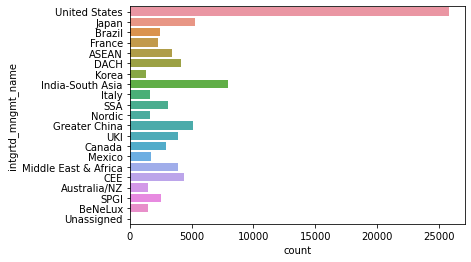

In [23]:
# plt.figure(figsize=(15,8))
sns.countplot(y=data['intgrtd_mngmt_name'])

### Pivot & Pivot table example

In [25]:
from collections import OrderedDict
table = OrderedDict((
    ("Item", ['Item0', 'Item0', 'Item0', 'Item1']),
    ('CType',['Gold', 'Bronze', 'Gold', 'Silver']),
    ('USD',  ['1',  '2',  '3',  '4']),
    ('EU',   ['1€', '2€', '3€', '4€'])
))
d = pd.DataFrame(table)
d

,Item,CType,USD,EU
0,Item0,Gold,1,1€
1,Item0,Bronze,2,2€
2,Item0,Gold,3,3€
3,Item1,Silver,4,4€


In [26]:
p = d.pivot(index='Item', columns='CType', values='USD')

ValueError: ignored

##### We cannot use pivot here as the column `CType` has `Gold` more than once so the function will get confused and will not understand which value of `USD` to put ie `1` or `3`. So we get the error that `ValueError: Index contains duplicate entries, cannot reshape`.
##### So in such as case where we have duplicate values in a column which is used  as a `columns` parameter in `pivot` the we should use `pivot_table` as it allows us to perform aggregation on that duplicate value

In [27]:
d['USD'] = d['USD'].astype('int')
# d['USD'] = d['USD'].astype('int')

In [28]:
d.pivot_table(index='CType', columns='Item', values='USD', aggfunc='sum')

Item,Item0,Item1
CType,,
Bronze,2.0,NaN
Gold,4.0,NaN
Silver,NaN,4.0


#### Visualise number of visits for top 20 countries

In [58]:
country_vists = data.groupby(['ctry_name'])['VISIT'].sum()

In [59]:
country_vists = country_vists.reset_index()

In [60]:
country_vists

,ctry_name,VISIT
0,Afghanistan,14.0
1,Aland Islands,6.0
2,Albania,31.0
3,Algeria,61.0
4,Andorra,3.0
...,...,...
184,Viet Nam,415.0
185,"Virgin Islands, British",1.0
186,Yemen,6.0
187,Zambia,14.0


In [61]:
country_vists.sort_values('VISIT', ascending=False, inplace=True)

In [62]:
country_vists.dtypes

ctry_name     object
VISIT        float64
dtype: object

Text(0.5, 1.0, 'Country wise Visits')

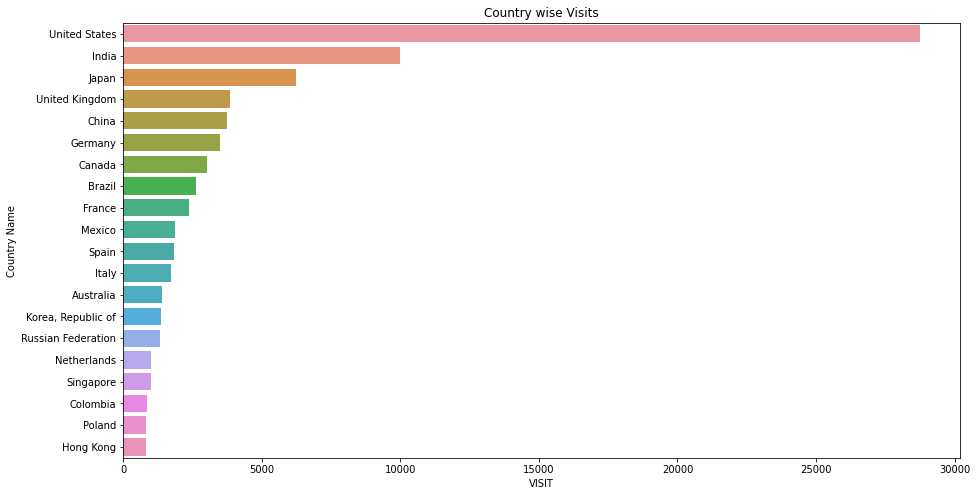

In [64]:
plt.figure(figsize=(15, 8))
sns.barplot(y=country_vists['ctry_name'].head(20), x=country_vists['VISIT'].head(20))
plt.ylabel('Country Name')
plt.title('Country wise Visits')

#### Same plot as above using `dataframe.plot.bar()`

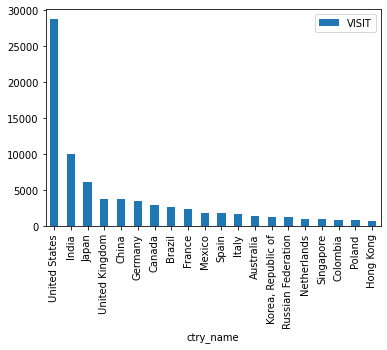

In [35]:
country_vists.head(20).plot.bar(x='ctry_name', y='VISIT')

## Visualize country wise traffic

In [53]:
country_traffic = data.pivot_table(index='ctry_name', values='ip_addr', aggfunc='count')

# country_traffic.sort_values(by='ip_addr', ascending=False, inplace=True)

country_traffic.nlargest(5, 'ip_addr')

,ip_addr
ctry_name,
United States,25772
India,7792
Japan,5282
China,3649
United Kingdom,3607


Text(0.5, 1.0, 'Country wise Traffic')

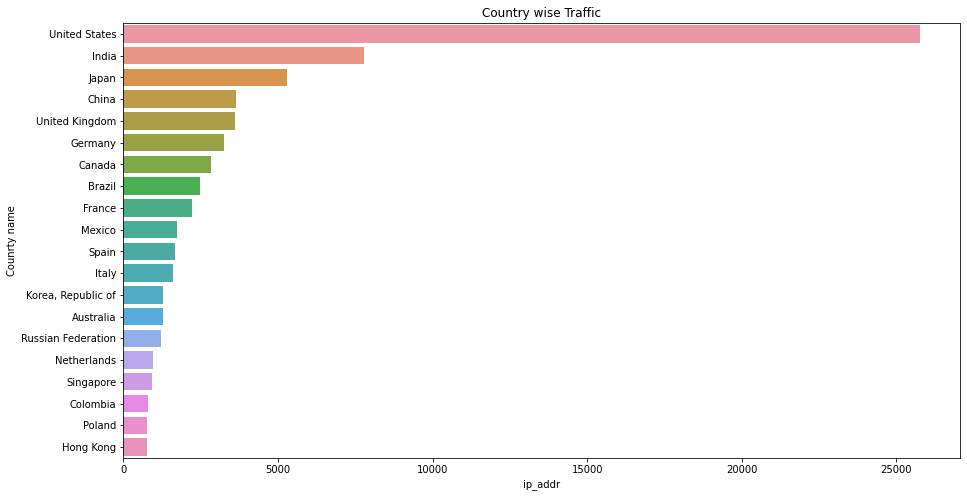

In [56]:
plt.figure(figsize=(15, 8))
sns.barplot(x=country_traffic.nlargest(20, 'ip_addr').ip_addr, y=country_traffic.nlargest(20, 'ip_addr').index)
plt.ylabel('Counrty name')
plt.title('Country wise Traffic')